<a href="https://colab.research.google.com/github/fboldt/aulasann/blob/main/aula02c_regress%C3%A3o_com_pseudo_inversa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import matplotlib.pyplot as plt

def plotDataset(X, y):
  plt.plot(X[:,0], y, 'o', alpha=0.3)


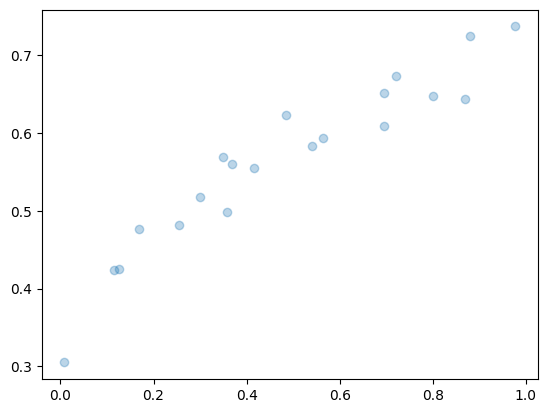

In [12]:
import numpy as np

def criaDatasetRegressão(n=20, slop=0.5, intercept=0.2):
  X = np.random.uniform(size=(n,1))
  AUX = np.random.rand(n,1)-0.5
  y = X**0.4 * slop + intercept + AUX*0.1
  y = y.flatten()
  return X, y

X, y = criaDatasetRegressão()
plotDataset(X, y)

In [13]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import mean_squared_error

def include_bias(X):
  bias = np.ones((X.shape[0],1))
  Xb = np.concatenate((bias, X), axis=1)
  return Xb

class Perceptron(BaseEstimator, ClassifierMixin):
  def fit(self, X, y):
    Xb = include_bias(X)
    self.w = np.linalg.pinv(Xb) @ y
    return self

  def predict(self, X):
    Xb = include_bias(X)
    return (Xb @ self.w)

model = Perceptron()
model.fit(X, y)
ypred = model.predict(X)
print(model.w)
print(mean_squared_error(y, ypred))


[0.39033703 0.36004199]
0.0011770970815224077


In [14]:
def plotRegressão(slop, intercept=-0.4):
  xs = np.array([0, 1])
  ys = (slop*xs+intercept)
  plt.plot(xs, ys, 'r-')


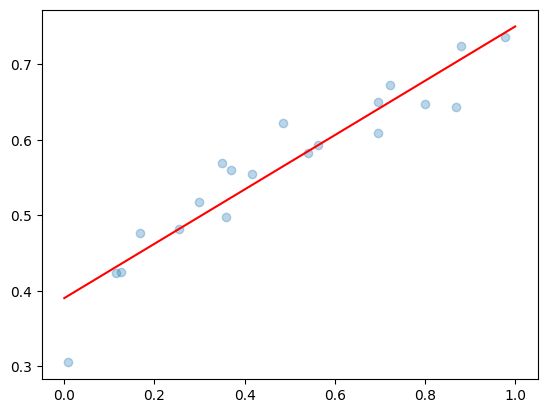

In [15]:
plotDataset(X, y)
plotRegressão(slop=model.w[1], intercept=model.w[0])
plt.show()

0.0015646798646588248


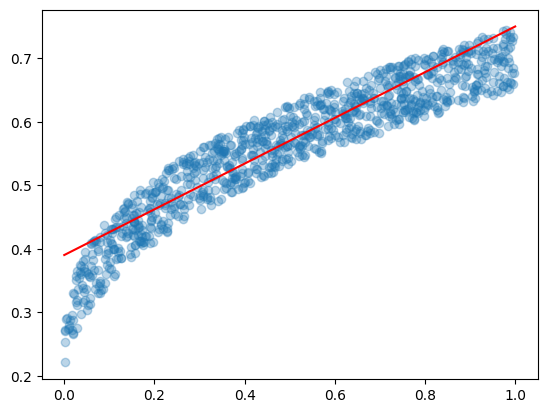

In [16]:
Xtest, ytest = criaDatasetRegressão(n=1000)
ypred = model.predict(Xtest)
print(mean_squared_error(ytest, ypred))
plotDataset(Xtest, ytest)
plotRegressão(model.w[1], intercept=model.w[0])
plt.show()